>Préparatifs

A000523 : https://oeis.org/A000523

In [130]:
def A000523(n):
    return len(bin(n))-3

A006667 : https://oeis.org/A006667

In [131]:
def A006667(n):
    if n==1:
        return 0
    x=0
    while True:
        if n%2==0:
            n//=2
        else:
            n=3*n+1
            x+=1
        if n<2: break
    return x

p-ième composante binaire d'un entier n

In [132]:
def B(n,p):
    return (n//(2**p))%2

In [133]:
import math

def BM(n):
  return int(math.log2(n))

In [134]:
def get_index_positions(list_of_elems,element):
    index_pos_list = []
    index_pos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            index_pos = list_of_elems.index(element, index_pos)
            # Add the index position in list
            index_pos_list.append(index_pos)
            index_pos += 1
        except ValueError as e:
            break
    return index_pos_list

In [135]:
def Binaire(n):
  l=list(bin(n))[2:]
  return [int(i) for i in l]

In [136]:
def Pb(n,l):
  return BM(n)-get_index_positions(Binaire(n),1)[l]

In [137]:
def LPb(n):
  return [p for p in range(BM(n)+1) if B(n,p)==1][::-1]

In [138]:
def RLPb(P):
  return sum([2**p for p in P])

>Création des datasets

In [139]:
import numpy as np

nmax=10**5
bmax=A000523(nmax)+1
X=np.array([[B(n,p) for p in range(bmax)] for n in range(1,nmax+1)])
y=np.array([A006667(n) for n in range(1,nmax+1)])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

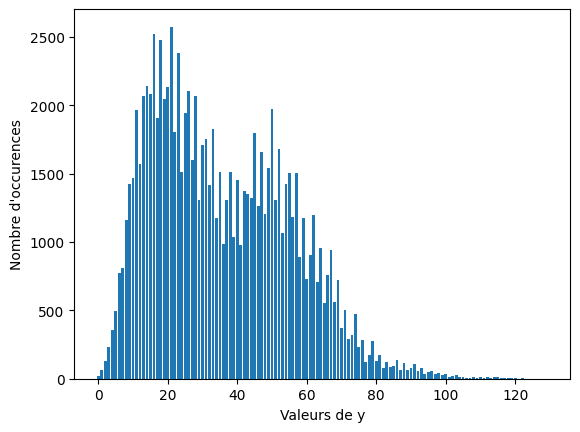

In [156]:
import collections
import matplotlib.pyplot as plt
counter = collections.Counter(y)
plt.bar(counter.keys(), counter.values())
plt.xlabel("Valeurs de y")
plt.ylabel("Nombre d'occurences")
plt.show()

>Modèle

In [157]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb=XGBRegressor(booster="gbtree")
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

>Coefficients du modèle

In [152]:
#Si et seulement si le booster est gblinear.
#print(xgb.coef_)

[ 4.66188   4.47895   2.0695    3.58925   1.56988   1.86819   0.947739
  0.687452 -0.153405 -0.254782 -0.513454  0.266655  0.618583  1.46754
  2.20051   4.37378   6.27139 ]


>Evaluation du modèle

>Explicabilité du modèle

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


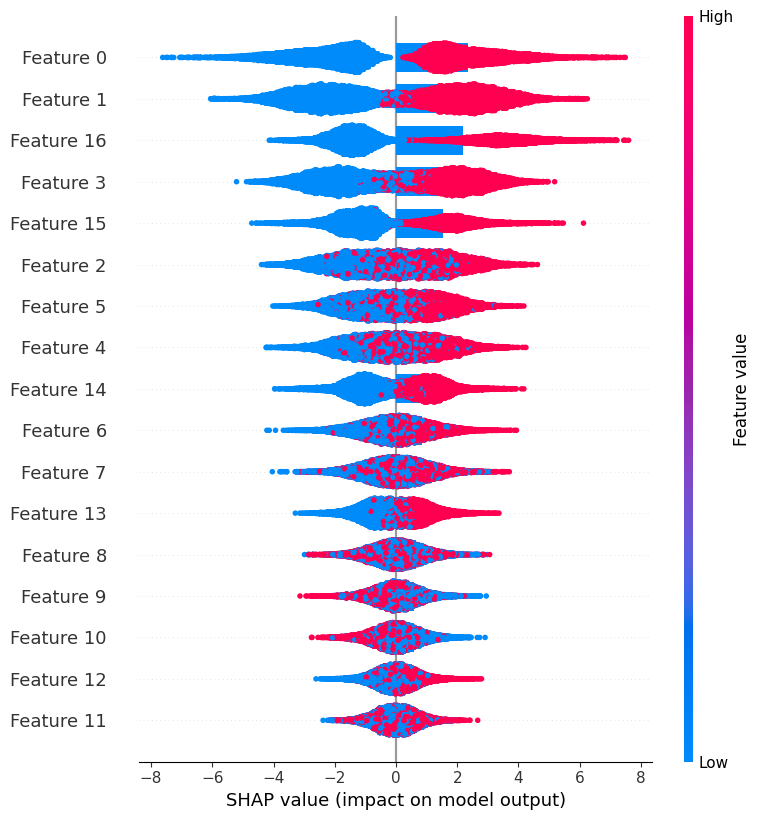

In [158]:
import matplotlib.pyplot as plt
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values=explainer.shap_values(X_test)
fig=shap.summary_plot(shap_values,X_test,plot_type="bar",show=False)
shap.summary_plot(shap_values,X_test,show=False)
plt.gcf().axes[-1].set_aspect('auto')
plt.tight_layout()
#shap.force_plot(explainer.expected_value[0],shap_values[0][0],X_test.iloc[0],matplotlib=True)